In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [57]:
# Загрузка данных и их трансформация
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.ImageFolder(root='C:/Учеба/Курсач ИУС/3-Classification/',
                                   transform=data_transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Определение модели
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN().cuda()

Using device: cuda


In [59]:
# Определение функции потерь и оптимизатора
model = CNN().to(device) 
criterion = nn.CrossEntropyLoss().cuda()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [60]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss}")



Epoch 1, Loss: 47.19831665419042
Epoch 2, Loss: 19.46624428697396
Epoch 3, Loss: 11.884957425761968
Epoch 4, Loss: 8.7879807991485
Epoch 5, Loss: 5.88066305036773
Epoch 6, Loss: 5.007322018774175
Epoch 7, Loss: 4.382363167067524
Epoch 8, Loss: 4.061492360271586
Epoch 9, Loss: 1.8954050573961467
Epoch 10, Loss: 1.2000933284084567


In [61]:
# Оценка модели
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in train_loader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")


Accuracy: 99.9843517721618%


Image 1


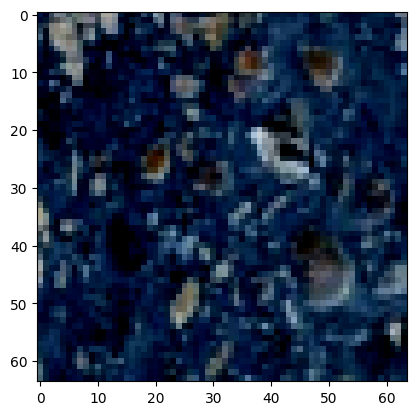

Label: 1
Image 2


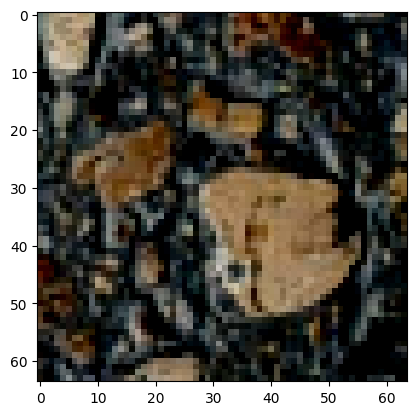

Label: 1
Image 3


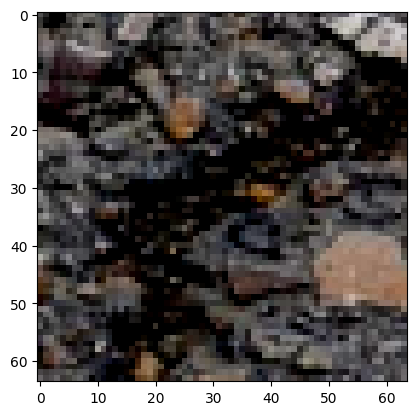

Label: 0
Image 4


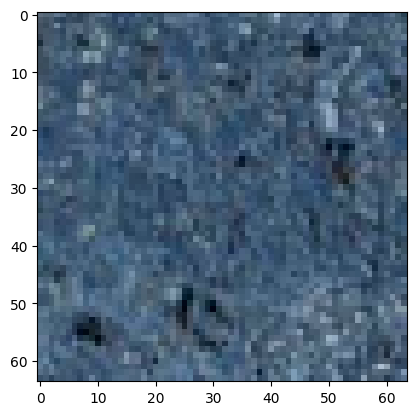

Label: 1
Image 5


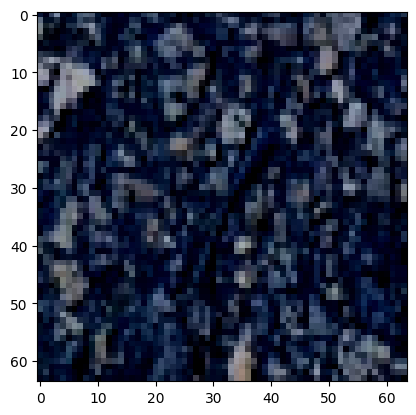

Label: 1


In [62]:
# Визуализация оригинальных изображений
import matplotlib.pyplot as plt
import numpy as np

# Функция для отображения изображений без нормализации
def imshow(img):
    npimg = img.numpy()
    npimg = np.clip(npimg, 0, 1)  # Обрезаем значения пикселей в допустимый диапазон [0, 1]
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Отображение оригинальных изображений и их меток
for i in range(5):
    print(f"Image {i+1}")
    imshow(correct_images[i])
    print(f"Label: {correct_labels[i].item()}")


In [63]:
torch.cuda.empty_cache()